<a href="https://colab.research.google.com/github/winnie9802/COMP6245/blob/main/labFour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

309 10
(309,)


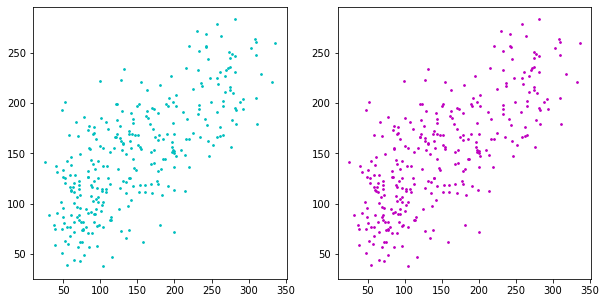

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()
X=diabetes.data  #读取数据
t=diabetes.target  #读取结果
#把数据分成训练集和测试集
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)

NumData, NumFeatures = X_train.shape
print(NumData, NumFeatures)
print(t_train.shape)


# 2. pseudo-inverse solution，没有正则化的
#-------------这是sklearn算的
lin = LinearRegression()
lin.fit(X_train, t_train)
th1 = lin.predict(X_train)

#-------------用公式算的
X2 = np.c_[X_train,np.ones([NumData,1])] #把X变成含有偏置的,加一列
w = np.linalg.inv(X2.T @ X2) @X2.T @t_train
th2 = X2 @ w

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
#---------------两种算法的对比图
ax[0].scatter(t_train,th1,c='c',s=3)
ax[1].scatter(t_train,th2,c='m',s=3)

plt.savefig('comparation of two.jpg')

Error of psuedo: [3068.89156866]
wL: [   0.           -0.          483.65699855  225.59232107   -0.
   -0.         -114.192892      0.          449.06916961   54.20876281]


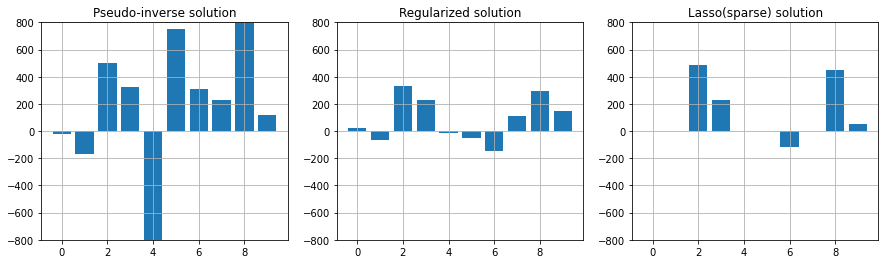

In [ ]:
# Pseudo-incerse solution to linear regression
# 不加正则化的回归
#---------训练数据
lin = LinearRegression()
lin.fit(X_train, t_train)
w = lin.coef_
#---------预测数据
th1 = lin.predict(X_test)
#---------计算误差
error = np.sum(np.square(th1-t_test))/t_test.shape
print("Error of psuedo:", error)

#岭回归正则化
#----------训练数据
gamma = 0.5
X2 = np.c_[X_train, np.ones([NumData,1])]
wR = np.linalg.inv(X2.T@X2 + gamma*np.identity(NumFeatures+1))@X2.T@t_train
#----------预测数据
xx = t_test.size
th2 = np.c_[X_test, np.ones([xx,1])] @ wR

#lasso正则化
from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.2)
#----------训练数据
ll.fit(X_train, t_train)
wL = ll.coef_
#----------预测数据
th_3 = ll.predict(X_test)

#画三幅图
#-------------没有正则化的图
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
plt.ylim(-800, 800)
ax[0].bar(np.arange(len(w)),w)
ax[0].set_ylim([-800,800])
ax[0].grid()
ax[0].set_title("Pseudo-inverse solution")

#-----------岭回归正则化的图
ax[1].bar(np.arange(len(wR)-1),wR[0:10])
ax[1].set_ylim([-800,800])
ax[1].grid()
ax[1].set_title("Regularized solution")

#-------------Lasso正则化的图
ax[2].bar(np.arange(len(wL)),wL)
print("wL:",wL)
ax[2].set_ylim([-800,800])
ax[2].grid()
ax[2].set_title("Lasso(sparse) solution")

plt.savefig("comparation of three.jpg")

In [ ]:
from sklearn.linear_model import Lasso

Error1 = []
WRSet = np.empty([10,0])
Error2 = []
WLSet = np.empty([10,0])
gamma = np.linspace(0,1,100)
for i in range(len(gamma)):
  #岭回归正则化
  #----------训练数据
  X2 = np.c_[X_train, np.ones([NumData,1])]
  wR = np.linalg.inv(X2.T@X2 + gamma[i]*np.identity(NumFeatures+1))@X2.T@t_train
  #----------预测数据
  xx = t_test.size
  th2 = np.c_[X_test, np.ones([xx,1])] @ wR
  #----------求误差
  pred_error = np.sum(np.square(th2-t_test))/t_test.shape
  Error1.append(pred_error)
  WRSet = np.c_[WRSet,wR[0:10]]

  #lasso正则化
  ll = Lasso(alpha=gamma[i])
  #----------训练数据
  ll.fit(X_train, t_train)
  wL = ll.coef_
  #----------预测数据
  th3 = ll.predict(X_test)
  #----------求误差
  pred_error = np.sum(np.square(th3-t_test))/t_test.shape
  Error2.append(pred_error)
  WLSet = np.c_[WLSet,wL]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.343e+05, tolerance: 1.796e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

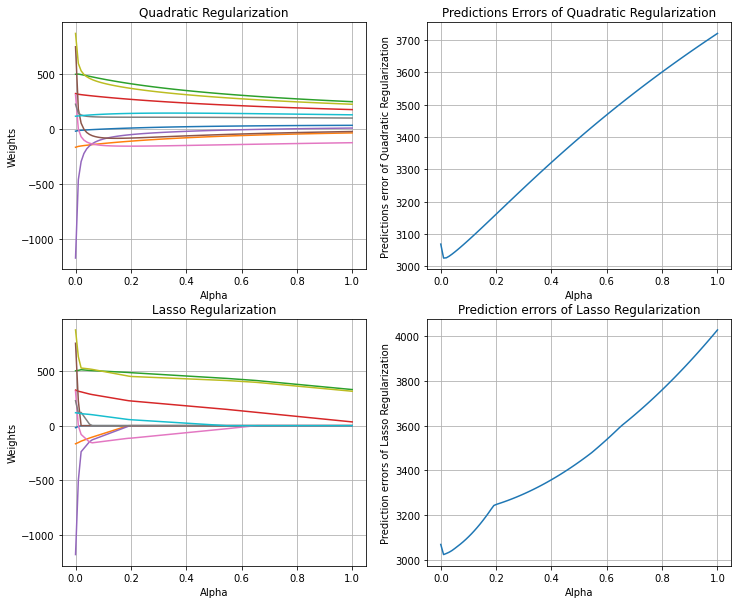

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10))
for i in range(10):
  ax[0][0].plot(gamma,WRSet[i,:])
  ax[0][0].grid(True)
  ax[0][0].set_xlabel("Alpha")
  ax[0][0].set_ylabel("Weights")
  ax[0][0].set_title("Quadratic Regularization")
ax[0][1].plot(gamma,Error1)
ax[0][1].grid(True)
ax[0][1].set_xlabel("Alpha")
ax[0][1].set_ylabel("Predictions error of Quadratic Regularization")
ax[0][1].set_title("Predictions Errors of Quadratic Regularization")
plt.figure()
for i in range(10):
  ax[1][0].plot(gamma,WLSet[i,:])
  ax[1][0].grid(True)  
  ax[1][0].set_xlabel("Alpha")
  ax[1][0].set_ylabel("Weights")
  ax[1][0].set_title("Lasso Regularization")
ax[1][1].plot(gamma,Error2)
ax[1][1].grid(True)
ax[1][1].set_xlabel("Alpha")
ax[1][1].set_ylabel("Prediction errors of Lasso Regularization")
ax[1][1].set_title("Prediction errors of Lasso Regularization")
plt.savefig('Comparation of erros.jpg')

442 10
(442,)
LinearRegression()
Pseudo err1: 1263983.156255485
Tikhanov err2: 1343275.9413577719
Lasso err3: 1323790.6250420404
[ 0.00000000e+00 -7.56146694e+01  5.11399919e+02  2.34512811e+02
 -0.00000000e+00 -0.00000000e+00 -1.70216601e+02  0.00000000e+00
  4.50679822e+02  2.23713285e-01]
wL: [ 0.00000000e+00 -7.56146694e+01  5.11399919e+02  2.34512811e+02
 -0.00000000e+00 -0.00000000e+00 -1.70216601e+02  0.00000000e+00
  4.50679822e+02  2.23713285e-01]


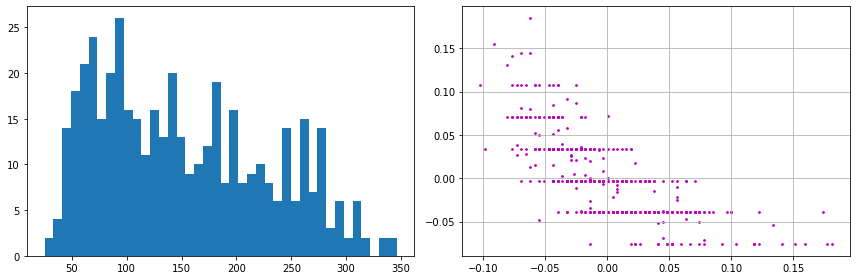

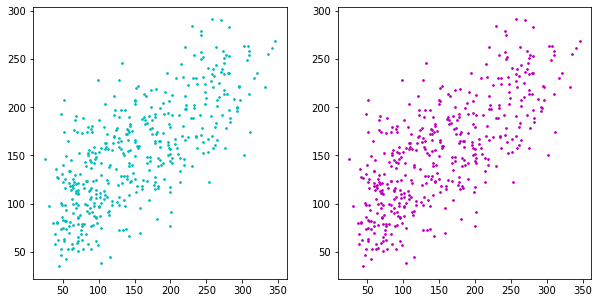

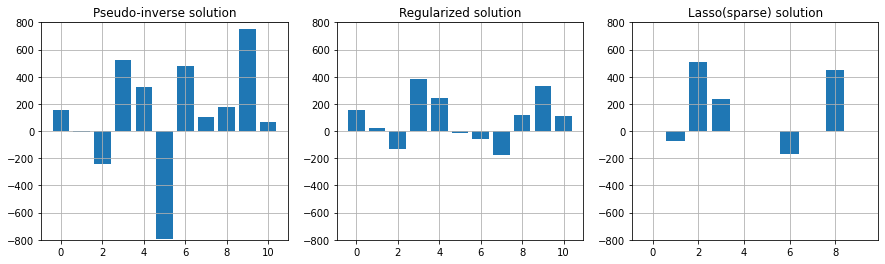

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import sympy
diabetes = datasets.load_diabetes()
X=diabetes.data  #读取数据
t=diabetes.target  #读取结果

NumData, NumFeatures = X.shape
print(NumData, NumFeatures)
print(t.shape)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
ax[0].hist(t,bins=40)
ax[1].scatter(X[:,6],X[:,7],c='m',s=3) #画图，两个feature的
ax[1].grid(True)
plt.tight_layout()
plt.savefig("DiabetesTargetAndTwoInputs.jpg")

# 2. pseudo-inverse solution，没有正则化的
#-------------这是sklearn算的
lin = LinearRegression()
lin.fit(X, t)
print(lin)
th1 = lin.predict(X)

#-------------用公式算的
X2 = np.c_[np.ones([NumData,1]),X] #把X变成含有偏置的
w = np.linalg.inv(X2.T @ X2) @X2.T @t
th2 = X2 @ w

######计算误差
err1 = np.sum(np.square(th1-t))
print("Pseudo err1:",err1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
#---------------两种算法的对比图
ax[0].scatter(t,th1,c='c',s=3)
ax[1].scatter(t,th2,c='m',s=3)

"""
#用模型求得线性参数
model = LinearRegression()
model.fit(X, t)
display(model.intercept_)  #截距
display(model.coef_)  #线性模型的系数

#自己算的线性参数
X = np.c_[np.ones([NumData,1]),X] #把
W = np.linalg.inv(X.T@X) @ X.T @ t
print(W.shape)
print(W)
"""
# 3.---------------------岭回归正则化
gamma = 0.5
wR = np.linalg.inv(X2.T@X2 + gamma*np.identity(NumFeatures+1))@X2.T@t
th3 = X2 @ wR
######计算误差
err2 = np.sum(np.square(th3-t))
print("Tikhanov err2:",err2)
plt.savefig("LeastSquaresAndRegularizedWeights.jpg")

# 4. -------------------Lasso正则化
from sklearn.linear_model import Lasso
l1 = Lasso(alpha=0.2)
l1.fit(X,t)
th_lasso = l1.predict(X)
wL = l1.coef_
######计算误差
err3 = np.sum(np.square(th_lasso-t))
print("Lasso err3:",err3)
print(wL)

#----------------没有正则化的图
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
plt.ylim(-800, 800)
ax[0].bar(np.arange(len(w)),w)
ax[0].set_ylim([-800,800])
ax[0].grid()
ax[0].set_title("Pseudo-inverse solution")

#----------------岭回归正则化的图
ax[1].bar(np.arange(len(wR)),wR)
ax[1].set_ylim([-800,800])
ax[1].grid()
ax[1].set_title("Regularized solution")

#----------------Lasso正则化的图
ax[2].bar(np.arange(len(wL)),wL)
print("wL:",wL)
ax[2].set_ylim([-800,800])
ax[2].grid()
ax[2].set_title("Lasso(sparse) solution")

plt.savefig("solutions.png")


y: []
X: []
X: (100, 6) y: (100,)


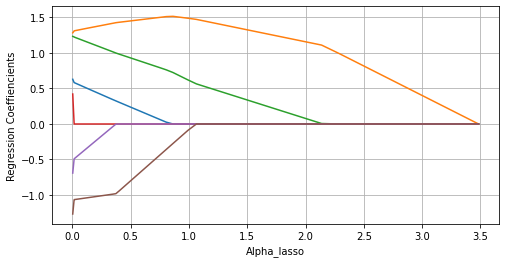

In [ ]:
#Lasso正则化路径
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from sklearn import datasets

# Synthetic data:
# Problem taken from Hastie, et al., Statistical Learning with Sparsity
# Z1, Z2 ~ N(0,1)
# Y = 3*Z1 -1.5*Z2 + 10*N(0,1) Noisy response
# Noisy inputs (the six are in two groups of three each)
# Xj= Z1 + 0.2*N(0,1) for j = 1,2,3, and
# Xj= Z2 + 0.2*N(0,1) for j = 4,5,6.

N = 100
y = np.empty(0)
print("y:",y)
X = np.empty([0,6])
print("X:",X)
for i in range(N):
  Z1= np.random.randn()
  Z2= np.random.randn()
  y = np.append(y, 3*Z1 - 1.5*Z2 + 2*np.random.randn())
  Xarr = np.array([Z1,Z1,Z1,Z2,Z2,Z2]) + np.random.randn(6)/5
  X = np.vstack((X, Xarr.tolist()))

print("X:",X.shape,"y:",y.shape)
# Compute regressions with Lasso and return paths
alphas_lasso, coefs_lasso, _ = lasso_path(X, y)
fig, ax = plt.subplots(figsize = (8,4))
for i in range(6):
  ax.plot(alphas_lasso, coefs_lasso[i,:])

ax.grid(True)
ax.set_xlabel("Alpha_lasso")
ax.set_ylabel("Regression Coeffiencients")
plt.savefig('lasso path.png')

(932, 2261)
Index([                    0, 'Compound_Identifier',              'Source',
                    'SMILES',             'LogS.M.',                  'MW',
                       'AMW',                  'Sv',                  'Se',
                        'Sp',
       ...
              'Psychotic-80',        'Psychotic-50',        'Hypertens-80',
              'Hypertens-50',         'Hypnotic-80',         'Hypnotic-50',
             'Neoplastic-80',       'Neoplastic-50',        'Infective-80',
        'Infective-50\r\r\n'],
      dtype='object', length=2261)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.411e+02, tolerance: 2.721e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


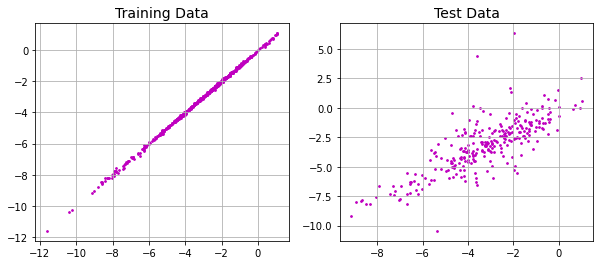

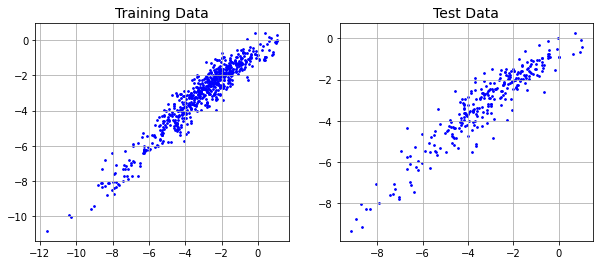

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
sol = pd.read_excel("Husskonen_Solubility_Features.xlsx", verbose=False)
print(sol.shape)

colnames = sol.columns
print(colnames)

t = sol["LogS.M."].to_numpy()
X = sol[colnames[5:len(colnames)-1]].to_numpy()
N,p=X.shape

#把数据分成训练集和测试集
#
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X,t,test_size=0.3)

#正则化回归
#
gamma = 0.1
w = np.linalg.inv(X_train.T @ X_train + gamma*np.identity(p))@X_train.T @ t_train
th_train = X_train @ w
th_test = X_test @ w

#画训练集和测试集
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(t_train, th_train, c='m', s=3)
ax[0].grid(True)
ax[0].set_title("Training Data", fontsize=14)

ax[1].scatter(t_test, th_test, c='m', s=3)
ax[1].grid(True)
ax[1].set_title("Test Data", fontsize=14)

plt.savefig("SolubilityPrediction.jpg")

#lasso 回归
l1 = Lasso(alpha=0.1)
l1.fit(X_train,t_train)
th_lasso_train = l1.predict(X_train)
th_lasso_test = l1.predict(X_test)
#wL = l1.coef_
######计算误差
fig2, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(t_train, th_lasso_train, c='b', s=3)
ax[0].grid(True)
ax[0].set_title("Training Data", fontsize=14)

ax[1].scatter(t_test, th_lasso_test, c='b', s=3)
ax[1].grid(True)
ax[1].set_title("Test Data", fontsize=14)
plt.savefig('LassoPrediction.jpg')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.760e-01, tolerance: 2.721e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, 

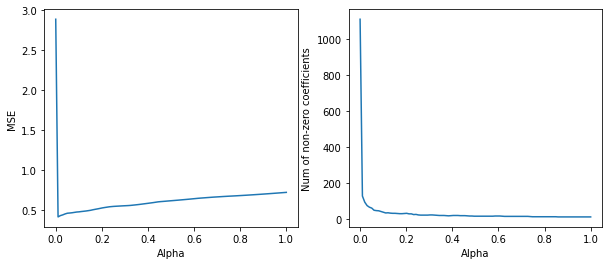

In [ ]:
#lasso 回归
alpha = np.linspace(0,1,100)
predError = []
num = []
for index in range(100):
  l1 = Lasso(alpha[index])
  l1.fit(X_train,t_train)
  th_lasso_train = l1.predict(X_train)
  th_lasso_test = l1.predict(X_test)
  wR = l1.coef_
  non_zero_number = 0
  for i in wR:
    if i>0:
      non_zero_number+=1
  pred_error = np.sum(np.square(th_lasso_test-t_test))/t_test.shape
  predError.append(pred_error)
  num.append(non_zero_number)
#预测误差
"""
  pred_error = np.sum(np.square(th_lasso_test-t_test))/t_test.shape
  print("non_zero_number:",non_zero_number)
  print("pred_error:",pred_error)
  fig2, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
  ax[0].scatter(t_train, th_lasso_train, c='b', s=3)
  ax[0].grid(True)
  ax[0].set_title("Training Data", fontsize=14)

  ax[1].scatter(t_test, th_lasso_test, c='b', s=3)
  ax[1].grid(True)
  ax[1].set_title("Test Data", fontsize=14)
"""

alpha = list(alpha)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].plot(alpha,predError)
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("MSE")
ax[1].plot(alpha,num)
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Num of non-zero coefficients")

plt.savefig('AlphaLassoPrediction.jpg')



In [ ]:
minnum = np.min(predError)
predError = np.array(predError)
index = np.where(predError==minnum)
print(alpha[index[0][0]])
print(a)




0.010101010101010102


In [ ]:
l1 = Lasso(alpha=0.01)
l1.fit(X_train,t_train)
th_lasso_train = l1.predict(X_train)
th_lasso_test = l1.predict(X_test)
wR = l1.coef_
absWr = list(np.abs(wR))
absWr.sort(reverse=True)
print(absWr)
indexSet = []
for i in range(10):
  index = np.where(np.abs(wR)==absWr[i])
  print(index[0])
  indexSet.append(index[0][0])

print("indexSet:",indexSet) 

colnames = sol.columns
print("colnames:",colnames)
nameSet=[]
print("colnames[5]:",colnames[5])

for i in indexSet:
  nameSet.append(colnames[i+5]) #前面的五个不是成分
print("nameSet",nameSet)
#t = sol["LogS.M."].to_numpy()
#X = sol[colnames[5:len(colnames)-1]].to_numpy()
#------重新计算
wR2 = wR
for i in range(len(wR2)):
  if i in indexSet:
    wR2
  else:
    wR2[i]=0

print(wR2)
th0 = X_test @ wR2 + l1.intercept_
MSE = np.sum(np.square(th0-t_test))/t_test.shape
print("MSE:",MSE)

#正则化回归
#
gamma = 0.01
w = np.linalg.inv(X_train.T @ X_train + gamma*np.identity(p))@X_train.T @ t_train
th_train = X_train @ w
th_test = X_test @ w
MSE2 = np.sum(np.square(th_test-t_test))/t_test.shape
print("MSE2:",MSE2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.661e+01, tolerance: 2.721e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[0.15888398707479395, 0.11451660590716599, 0.10956662426680028, 0.09136337187924719, 0.0879058585704212, 0.08096713375266047, 0.07988721489346963, 0.07878071164234703, 0.07751729978305155, 0.07490667409142675, 0.0690350044906715, 0.06881099601915046, 0.0670022813845804, 0.06579928986844875, 0.0637230974104526, 0.06159314148708857, 0.06037394242311109, 0.05988548916292999, 0.0583500941252844, 0.05685913181626288, 0.054476432137824854, 0.05102292617468427, 0.05043308197145877, 0.049622749102396155, 0.043816678163514956, 0.04043177031136868, 0.040149200163581374, 0.037327309915853174, 0.03713567430663486, 0.03689895870143058, 0.036217108356457084, 0.03551353168128159, 0.03262817174220103, 0.02885698748719383, 0.027811866491009685, 0.02729222617831604, 0.026336131726163555, 0.025352887435440882, 0.024578670684655347, 0.024541643975785697, 0.022640476849783833, 0.0220693322543261, 0.021320012717997296, 0.021182851262951385, 0.020940270924345666, 0.020771987822265803, 0.02054481736115077, 0.

In [ ]:
l1 = Lasso(alpha=0.01)
l1.fit(X_train,t_train)
th_lasso_train = l1.predict(X_train)
th_lasso_test = l1.predict(X_test)
wR = l1.coef_
from sklearn.metrics import r2_score
print(r2_score(t_test,th_lasso_test))
print("th_lassotest:",th_lasso_test)
print(np.log(np.std(th_lasso_test)))

0.8937594082683239
th_lassotest: [-3.47410544 -2.46242753  0.28806986 -5.24667112 -4.0770237  -2.75399278
 -2.10823389 -5.99505255 -3.32686106 -4.8085343  -3.19824343 -1.94942599
 -1.17996318 -3.00733123 -3.24143623 -3.46764171 -3.60028089 -1.75766579
 -1.89477672 -4.26852198 -4.58896748 -1.42679943 -2.70544806 -1.79515702
 -4.91101661 -8.30832868 -4.51521317 -8.01068289 -3.20807961 -2.9178736
 -1.35015697 -2.05195328 -4.64106302 -3.66568414 -8.83344546 -1.59873849
 -2.41096251 -3.15769336 -0.6689112  -2.81511081 -1.93671693 -2.0576745
 -2.35023806 -3.66520781 -3.84477069 -1.14514211 -5.87210273 -1.6278445
 -5.2245885  -3.10376877 -3.20338781 -6.43939434 -1.69941436 -7.08979714
 -2.00967277 -1.39181877 -4.45258144 -9.42176468 -2.11722582 -2.72392332
 -7.32034913 -8.19509775 -3.785412   -1.73229751 -2.49780664 -3.35901296
 -2.05554724 -2.18156126 -0.21472838 -3.9725098  -6.56416267 -1.55611442
 -0.67256748 -0.50005515 -2.20127535 -5.70479052 -6.16171806 -3.0569449
 -3.2841023  -4.221516

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.661e+01, tolerance: 2.721e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
#Lasso正则化路径
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from sklearn import datasets

# Compute regressions with Lasso and return paths
alphas_lasso, coefs_lasso, dual_gaps = lasso_path(X_train, t_train)
fig, ax = plt.subplots(figsize = (8,4))

pred_error = np.sum(np.square(th_lasso_test-t_test))/t_test.shape
for i in range(6):
  ax.plot(alphas_lasso, coefs_lasso[i,:])

ax.grid(True)
ax.set_xlabel("Alpha_lasso")
ax.set_ylabel("Regression Coeffiencients")
plt.savefig('lasso path.png')